In [41]:
# file manipualtion
from pathlib import Path
import numpy as np
import pandas as pd

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# visualistaion
import matplotlib.pyplot as plt

In [42]:
# defining the directory to original data
directory = Path('./data/')
additional_directory = Path('./additional_data')

# list the .csv files for the project
for file in directory.glob('*.csv'):
    print(file)

data/vehicles2019.csv
data/accidents2019.csv
data/casualties2019.csv


In [43]:
# # reading in .csv files to dataframes
# vehicles = pd.read_csv(directory / 'vehicles2019.csv', dtype={'Accident_Index': str})
# casualties = pd.read_csv(directory / 'casualties2019.csv', dtype={'Accident_Index': str})
# accidents = pd.read_csv(directory / 'accidents2019.csv', dtype={'Accident_Index': str,
#                                                                 'LSOA_of_Accident_Location': str})

# # convert column names to lowercase for ease of indexing
# def lower_columns(df):
#     """
#     Defintion:
#         convert column names to lower case
#     """
#     df.columns = map(str.lower, df.columns)
    
# # converting all column names to lower case
# lower_columns(vehicles)
# lower_columns(casualties)
# lower_columns(accidents)

# accidents.head(5)

In [44]:

def get_models():
    models = {}
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    return models

models = get_models()

models

{'dtree': DecisionTreeClassifier(),
 'knn': KNeighborsClassifier(),
 'lr': LogisticRegression(),
 'bayes': GaussianNB()}

In [45]:
df = pd.read_pickle('accidents_cleaned.pkl')

df.head(5)

,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,district,converted_date,converted_time,datetime,decimal_time,day_of_year
0,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,0,1,3,E01003117,lambeth,2019-01-15,21:45:00,2019-01-15 21:45:00,21.750000,15
1,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,0,1,1,E01003023,lambeth,2019-01-15,08:42:00,2019-01-15 08:42:00,8.700000,15
2,2019010157732,-0.145106,51.461256,1,2,1,2,3,9,E09000022,...,0,1,1,E01003026,lambeth,2019-01-15,07:08:00,2019-01-15 07:08:00,7.133333,15
3,2019010157896,-0.240823,51.533125,1,3,2,1,3,28,E09000005,...,0,1,1,E01000535,brent,2019-01-15,21:05:00,2019-01-15 21:05:00,21.083333,15
4,2019010157795,0.161736,51.550272,1,3,1,1,3,16,E09000002,...,0,1,1,E01000035,barking and dagenham,2019-01-15,16:10:00,2019-01-15 16:10:00,16.166667,15


In [46]:
predictors = ['weather_conditions', 'speed_limit',
              'road_surface_conditions', 'light_conditions']

target = 'accident_severity'

# create a second DataFrame object with the predictors as its only columns
filtered = df.filter(['weather_conditions', 'speed_limit',
                               'road_surface_conditions',
                               'light_conditions',
                               'accident_severity'], axis=1)

# filter for positive values
filtered = filtered.loc[(filtered.weather_conditions > 0) & (filtered.speed_limit > 0) & (filtered.road_surface_conditions > 0) & (filtered.light_conditions > 0) & (filtered.accident_severity > 0), :]

filtered.head(5)

,weather_conditions,speed_limit,road_surface_conditions,light_conditions,accident_severity
0,1,30,1,4,3
1,1,30,1,1,3
2,1,30,1,4,2
3,1,30,1,4,3
4,1,30,1,1,3


In [47]:
# feature selection

selector = SelectKBest(f_classif, k='all')
selector.fit(filtered[predictors], filtered[target])

scores = -np.log(selector.pvalues_)
scores

array([ 21.01401322, 442.45456514,  11.50708154,  79.80205595])

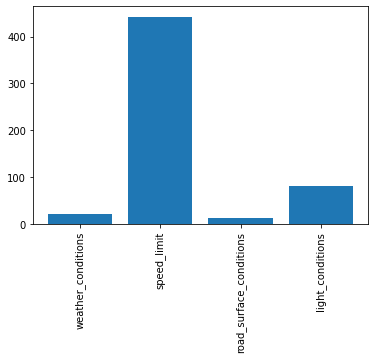

In [48]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()